In [1]:
using Pkg; Pkg.activate("/Users/adrocampos/covid19/env_2")
using Plots
using CSV
using DataFrames
using JLD
using Statistics
using StatsPlots
using ColorSchemes
using Measures
using Latexify

  Activating project at `~/covid19/env_2`


## Colors for plots

In [2]:
palette_SIR = palette(:Dark2_8)[1:3]
c_S, c_I, c_R = palette_SIR

In [3]:
palette_models = palette(:Dark2_8)[6:8]
c_ode, c_ann, c_uode = palette_models

In [4]:
palette_sindy = palette(:Dark2_8)[4:4]
c_sindy = palette_sindy

## Cummulative train and test sets

In [5]:
tspan_test  = (1,501)
tspan_train = (1,251)
mobility = ["border", "inv_dist", "neighbor"][2]

Ss_no_init = []
Is_no_init = []
Rs_no_init = []

for init in collect(1:20)

    ## Loading training and testing data
    data_dir = "/Users/adrocampos/covid19/synth_data/"
    file_name = "SIR_" * string(10) * "_regions_" * mobility * "_" * string(init) * ".csv"
    println("Input file = ", data_dir * file_name)
    
    csv_reader = CSV.File(data_dir * file_name, types=Float64) 
    df = DataFrame(csv_reader)
    X = Matrix(df)[:,2:end] ## Filtering out t
    mask = (1:10:5001) ## Defines resolution of input data
    X = X[mask, :]'
    
    S = sum(X[1:3:30,:], dims=1)
    I = sum(X[2:3:30,:], dims=1)
    R = sum(X[3:3:30,:], dims=1)

    push!(Ss_no_init, S)
    push!(Is_no_init, I)
    push!(Rs_no_init, R)

end

Ss_no_init = reduce(vcat, Ss_no_init)
Is_no_init = reduce(vcat, Is_no_init)
Rs_no_init = reduce(vcat, Rs_no_init)



Ss_quart = []
Is_quart = []
Rs_quart = []


for init in collect(51:70)
    
    ## Loading training and testing data
    data_dir = "/Users/adrocampos/covid19/synth_data/"
    file_name = "SIR_" * string(10) * "_regions_" * mobility * "_" * string(init) * ".csv"
    println("Input file = ", data_dir * file_name)
    
    csv_reader = CSV.File(data_dir * file_name, types=Float64) 
    df = DataFrame(csv_reader)
    X = Matrix(df)[:,2:end] ## Filtering out t
    mask = (1:10:5001) ## Defines resolution of input data
    X = X[mask, :]'

    println(X[:,1])
    
    S = sum(X[1:3:30,:], dims=1)
    I = sum(X[2:3:30,:], dims=1)
    R = sum(X[3:3:30,:], dims=1)

    push!(Ss_quart, S)
    push!(Is_quart, I)
    push!(Rs_quart, R)

end

Ss_quart = reduce(vcat, Ss_quart)
Is_quart = reduce(vcat, Is_quart)
Rs_quart = reduce(vcat, Rs_quart)

Input file = /Users/adrocampos/covid19/synth_data/SIR_10_regions_inv_dist_1.csv
Input file = /Users/adrocampos/covid19/synth_data/SIR_10_regions_inv_dist_2.csv
Input file = /Users/adrocampos/covid19/synth_data/SIR_10_regions_inv_dist_3.csv
Input file = /Users/adrocampos/covid19/synth_data/SIR_10_regions_inv_dist_4.csv
Input file = /Users/adrocampos/covid19/synth_data/SIR_10_regions_inv_dist_5.csv
Input file = /Users/adrocampos/covid19/synth_data/SIR_10_regions_inv_dist_6.csv
Input file = /Users/adrocampos/covid19/synth_data/SIR_10_regions_inv_dist_7.csv
Input file = /Users/adrocampos/covid19/synth_data/SIR_10_regions_inv_dist_8.csv
Input file = /Users/adrocampos/covid19/synth_data/SIR_10_regions_inv_dist_9.csv
Input file = /Users/adrocampos/covid19/synth_data/SIR_10_regions_inv_dist_10.csv
Input file = /Users/adrocampos/covid19/synth_data/SIR_10_regions_inv_dist_11.csv
Input file = /Users/adrocampos/covid19/synth_data/SIR_10_regions_inv_dist_12.csv
Input file = /Users/adrocampos/covid1

20×501 Matrix{Float64}:
 7861.0  7869.88  7894.21  7933.49  …  31445.7  31445.7  31445.7  31445.7
 7861.0  7869.96  7894.51  7934.16     31445.7  31445.7  31445.7  31445.7
 7861.0  7870.01  7894.69  7934.56     31445.7  31445.7  31445.7  31445.7
 7861.0  7869.88  7894.18  7933.43     31445.7  31445.7  31445.7  31445.7
 7861.0  7869.93  7894.38  7933.86     31445.7  31445.7  31445.7  31445.7
 7861.0  7869.89  7894.23  7933.55  …  31445.7  31445.7  31445.7  31445.7
 7861.0  7869.9   7894.26  7933.61     31445.7  31445.7  31445.7  31445.7
 7861.0  7869.99  7894.62  7934.4      31445.7  31445.7  31445.7  31445.7
 7861.0  7869.96  7894.5   7934.13     31445.7  31445.7  31445.7  31445.7
 7861.0  7869.88  7894.19  7933.45     31445.7  31445.7  31445.7  31445.7
 7861.0  7869.89  7894.22  7933.53  …  31445.7  31445.7  31445.7  31445.7
 7861.0  7869.92  7894.36  7933.82     31445.7  31445.7  31445.7  31445.7
 7861.0  7869.77  7893.75  7932.46     31445.7  31445.7  31445.7  31445.7
 7861.0  7869.

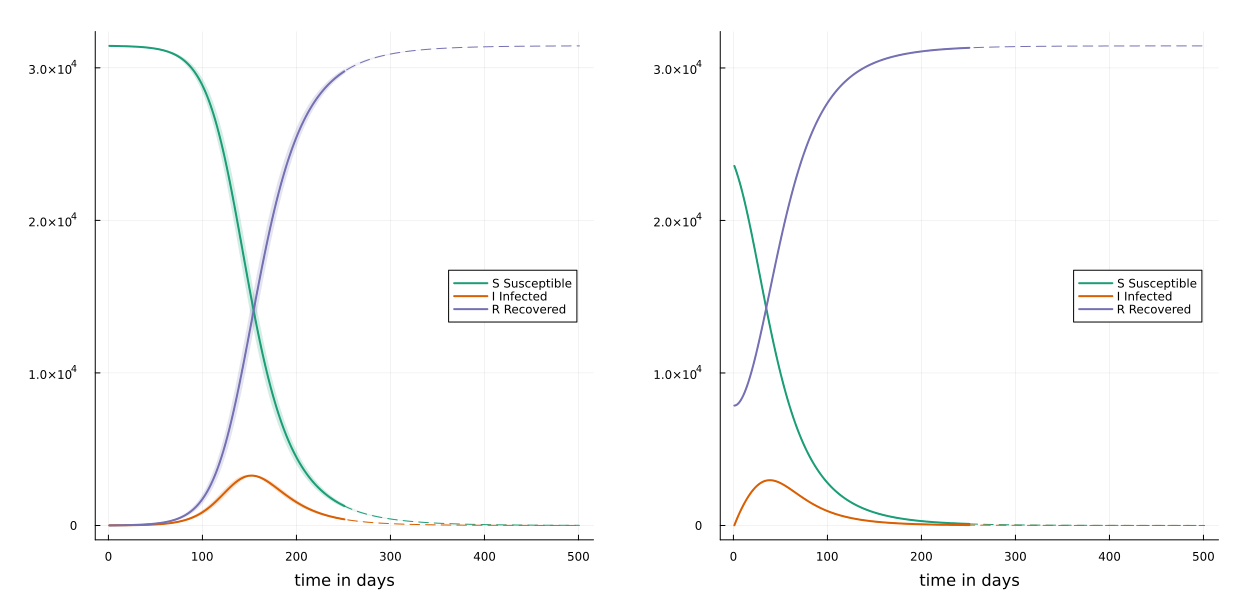

"/Users/adrocampos/covid19/geography_dynamics.pdf"

In [6]:
line_no_init = errorline(Ss_no_init', errorstyle=:ribbon, secondarycolor=:matched, label=nothing, palette=[c_S], xlabel="time in days", ls=:dash)
line_no_init = errorline!(Is_no_init', errorstyle=:ribbon, secondarycolor=:matched, label=nothing, palette=[c_I], ls=:dash)
line_no_init = errorline!(Rs_no_init', errorstyle=:ribbon, secondarycolor=:matched, label=nothing, palette=[c_R], ls=:dash)
line_no_init = errorline!(Ss_no_init[:,1:251]', errorstyle=:ribbon, label="S Susceptible" ,secondarycolor=:matched, palette=[c_S], lw=2)
line_no_init = errorline!(Is_no_init[:,1:251]', errorstyle=:ribbon, label="I Infected" ,secondarycolor=:matched, palette=[c_I], lw=2)
line_no_init = errorline!(Rs_no_init[:,1:251]', errorstyle=:ribbon, label="R Recovered" ,secondarycolor=:matched, palette=[c_R], lw=2, margin=6Plots.mm)

line_quart = errorline(Ss_quart', errorstyle=:ribbon, secondarycolor=:matched, label=nothing, palette=[c_S], xlabel="time in days", ls=:dash)
line_quart = errorline!(Is_quart', errorstyle=:ribbon, secondarycolor=:matched, label=nothing, palette=[c_I],  ls=:dash)
line_quart = errorline!(Rs_quart', errorstyle=:ribbon, secondarycolor=:matched, label=nothing, palette=[c_R],  ls=:dash)
line_quart = errorline!(Ss_quart[:,1:251]', errorstyle=:ribbon, label="S Susceptible" ,secondarycolor=:matched, palette=[c_S],  xlabel="time in days", lw=2)
line_quart = errorline!(Is_quart[:,1:251]', errorstyle=:ribbon, label="I Infected" ,secondarycolor=:matched, palette=[c_I], lw=2)
line_quart = errorline!(Rs_quart[:,1:251]', errorstyle=:ribbon, label="R Recovered" ,secondarycolor=:matched, palette=[c_R], lw=2, margin=6Plots.mm)

both = plot(line_no_init, line_quart, layout=(1,2), legend=:right, size=(1250,600))
display(both)
savefig(both, "geography_dynamics.pdf")

## Model performance

In [7]:
inits = [collect(1:20); collect(51:70)]

40-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
  ⋮
 59
 60
 61
 62
 63
 64
 65
 66
 67
 68
 69
 70

### Define metrics

In [8]:
function error_incidence(pred, obs) ## or accumulated?
    incidence_pred = diff(pred[2,:]) / sum(pred[:,1]) ## New infected / N
    incidence_obs  = diff(obs[2,:])  / sum(obs[:,1])  ## New infected / N
    return sum(abs.(incidence_pred-incidence_obs)) 
end

error_incidence (generic function with 1 method)

In [9]:
function mse(pred, x_test)
    sum(abs2, x_test .- pred) / size(x_test, 2)
end

mse (generic function with 1 method)

In [11]:
d_mse = 1
d_inc = 5

5

### Load preds and obs and measure distance

In [12]:
results_ode_mse_test = Float64[]
results_ann_mse_test = Float64[]
results_uode_mse_test = Float64[]

results_ode_rel_test = Float64[]
results_ann_rel_test = Float64[]
results_uode_rel_test = Float64[]

results_ode_mse_all = Float64[]
results_ann_mse_all = Float64[]
results_uode_mse_all = Float64[]

results_ode_rel_all = Float64[]
results_ann_rel_all = Float64[]
results_uode_rel_all = Float64[]



tspan_test  = 251:501
tspan_train = 1:251
mobility = ["border", "inv_dist", "neighbor"][2]

failed = Tuple{Int, Int}[]

for target_region in 1:10
    
    for init in inits

        ## Loading training and testing data
        data_dir = "/Users/adrocampos/covid19/synth_data/"
        file_name = "SIR_" * string(10) * "_regions_" * mobility * "_" * string(init) * ".csv"

        csv_reader = CSV.File(data_dir * file_name, types=Float64) 
        df = DataFrame(csv_reader)
        X = Matrix(df)[:,2:end] ## Filtering out t
        mask = (1:10:5001) ## Defines resolution of input data
        X = X[mask, :]'
        
        universe = range(1, size(X)[1], step=1)
        index_target = (target_region - 1) * 3 + 1
        targets = [index_target, index_target+1, index_target+2]
        adjacents = setdiff(universe , targets)
    
        x_target = X[targets,:]
        x_adjacent = X[adjacents,:]
        x_test = x_target

        ## Loading preedictions
        folder_name = "SIR_discovery/SIR_" * string(10) * "_regions_" * mobility * "_" * string(tspan_train[end]) *  "/"
        save_dir = "/Users/adrocampos/covid19/" * folder_name * "init_" * lpad(init,2,"0")  * "/region_" * lpad(target_region,2,"0") * "/"
        ode_pred  = load(save_dir * "1_ODE_pred.jld", "ODE_pred")
        ann_pred  = load(save_dir * "2_ANN_pred.jld", "ANN_pred")
        uode_pred = load(save_dir * "3_UODE_pred.jld", "UODE_pred")

        try
            push!(results_ode_mse_test,  mse(ode_pred[:,tspan_test],  x_test[:,tspan_test]))
            push!(results_ann_mse_test,  mse(ann_pred[:,tspan_test],  x_test[:,tspan_test]))
            push!(results_uode_mse_test, mse(uode_pred[:,tspan_test], x_test[:,tspan_test]))
        
            push!(results_ode_rel_test, error_incidence(ode_pred[:,tspan_test],  x_test[:,tspan_test]))
            push!(results_ann_rel_test, error_incidence(ann_pred[:,tspan_test],  x_test[:,tspan_test]))
            push!(results_uode_rel_test,error_incidence(uode_pred[:,tspan_test], x_test[:,tspan_test]))
            
            push!(results_ode_mse_all,  mse(ode_pred,  x_test))
            push!(results_ann_mse_all,  mse(ann_pred,  x_test))
            push!(results_uode_mse_all, mse(uode_pred, x_test))
        
            push!(results_ode_rel_all, error_incidence(ode_pred,  x_test))
            push!(results_ann_rel_all, error_incidence(ann_pred,  x_test))
            push!(results_uode_rel_all,error_incidence(uode_pred, x_test))
            
       catch e
            println("error_in = " ,file_name)
       end
         
    end
end

In [13]:
### Split between no initially infected and 25% initially infected
println(size(results_ode_mse_test))

no_init_results_ode_mse_test  = results_ode_mse_test[1:200]
no_init_results_ann_mse_test  = results_ann_mse_test[1:200]
no_init_results_uode_mse_test = results_uode_mse_test[1:200]

no_init_results_ode_rel_test  = results_ode_rel_test[1:200]
no_init_results_ann_rel_test  = results_ann_rel_test[1:200]
no_init_results_uode_rel_test = results_uode_rel_test[1:200]

quarter_results_ode_mse_test  = results_ode_mse_test[201:400]
quarter_results_ann_mse_test  = results_ann_mse_test[201:400]
quarter_results_uode_mse_test = results_uode_mse_test[201:400]

quarter_results_ode_rel_test = results_ode_rel_test[201:400]
quarter_results_ann_rel_test = results_ann_rel_test[201:400]
quarter_results_uode_rel_test = results_uode_rel_test[201:400]

(400,)


200-element Vector{Float64}:
 0.0011644307350547158
 0.0009238999146193894
 0.0018704617841560818
 0.0016885773469000102
 0.0012793884520202424
 0.001093956270717345
 0.0012261416831334244
 0.0012015305144311265
 0.0012036468005791011
 0.0011527424873964116
 0.002033512809533205
 0.0011196046437241178
 0.001320194867009126
 ⋮
 0.00010139187059772182
 0.00010343036753505571
 0.00010688010005529714
 0.00011411628948332188
 0.00011204291388999643
 0.00010911130020076636
 0.0001098972338948503
 0.00010867161494108063
 0.00011158534536849172
 0.00010932354531035827
 0.00011218717530595386
 0.00010961085498312926

In [14]:
### Split between no initially infected and 25% initially infected
println(size(results_ode_mse_all))

no_init_results_ode_mse_all  = results_ode_mse_all[1:200]
no_init_results_ann_mse_all  = results_ann_mse_all[1:200]
no_init_results_uode_mse_all = results_uode_mse_all[1:200]

no_init_results_ode_rel_all  = results_ode_rel_all[1:200]
no_init_results_ann_rel_all  = results_ann_rel_all[1:200]
no_init_results_uode_rel_all = results_uode_rel_all[1:200]

quarter_results_ode_mse_all  = results_ode_mse_all[201:400]
quarter_results_ann_mse_all  = results_ann_mse_all[201:400]
quarter_results_uode_mse_all = results_uode_mse_all[201:400]

quarter_results_ode_rel_all = results_ode_rel_all[201:400]
quarter_results_ann_rel_all = results_ann_rel_all[201:400]
quarter_results_uode_rel_all = results_uode_rel_all[201:400]

(400,)


200-element Vector{Float64}:
 0.007188627899634464
 0.006328410427916964
 0.005674898353220419
 0.02893940311391177
 0.0061903040249532216
 0.006866627031245986
 0.005688363886303406
 0.007921393326664595
 0.00519554715587646
 0.009916224523098573
 0.01227063366624756
 0.007611971388208865
 0.006652666944182363
 ⋮
 0.010078470891545059
 0.007935744438024665
 0.0015401864766917356
 0.005921941173186257
 0.003698899237329314
 0.0031548350249737257
 0.003165402033320721
 0.002290345400227605
 0.005232019173804353
 0.002788175275402773
 0.005128958666124476
 0.003119327821879554

### Report per Region: No initially infected

In [15]:
# for (i, v) in enumerate(1:20:200)

#     ind = v:v+19
#     println("Region ", i, " indices = ", ind)
#     println("ODE MSE = ", size(no_init_results_ode_mse[ind]), " min = ", minimum(no_init_results_ode_mse[ind]), " median = ", median(no_init_results_ode_mse[ind]))
#     println("ANN MSE = ", size(no_init_results_ann_mse[ind]), " min = ", minimum(no_init_results_ann_mse[ind]), " median = ", median(no_init_results_ann_mse[ind]))
#     println("UODE MSE = ", size(no_init_results_uode_mse[ind]), " min = ", minimum(no_init_results_uode_mse[ind]), " median = ", median(no_init_results_uode_mse[ind]), "\n")

#     println("ODE INC = ", size(no_init_results_ode_rel[ind]), " min = ", minimum(no_init_results_ode_rel[ind]), " median = ", median(no_init_results_ode_rel[ind]))
#     println("ANN INC = ", size(no_init_results_ann_rel[ind]), " min = ", minimum(no_init_results_ann_rel[ind]), " median = ", median(no_init_results_ann_rel[ind]))
#     println("UODE INC = ", size(no_init_results_uode_rel[ind]), " min = ", minimum(no_init_results_uode_rel[ind]), " median = ", median(no_init_results_uode_rel[ind]), "\n")

# end

In [16]:
### Lines for table in LaTeX
for (i, v) in enumerate(1:20:200)
    ind = v:v+19
    println(i, " & ",  round.(median( no_init_results_ode_mse_test[ind]);  digits=d_mse),
               " & ",  round.(median( no_init_results_ann_mse_test[ind]);  digits=d_mse),
               " & ",  round.(median( no_init_results_uode_mse_test[ind]); digits=d_mse), 

               " & ",  round.(median( no_init_results_ode_mse_all[ind]);  digits=d_mse),
               " & ",  round.(median( no_init_results_ann_mse_all[ind]);  digits=d_mse),
               " & ",  round.(median( no_init_results_uode_mse_all[ind]); digits=d)_mse, " \\\\") 
end

LoadError: UndefVarError: `d` not defined

In [17]:
### Lines for table in LaTeX
for (i, v) in enumerate(1:20:200)

    d = 5
    ind = v:v+19
    
    println(i, " & ",  round.(median( no_init_results_ode_rel_test[ind]);  digits=d_inc),
               " & ",  round.(median( no_init_results_ann_rel_test[ind]);  digits=d_inc),
               " & ",  round.(median( no_init_results_uode_rel_test[ind]); digits=d_inc), 

               " & ",  round.(median( no_init_results_ode_rel_all[ind]);  digits=d_inc),
               " & ",  round.(median( no_init_results_ann_rel_all[ind]);  digits=d_inc),
               " & ",  round.(median( no_init_results_uode_rel_all[ind]); digits=d_inc), " \\\\") 
    
end

1 & 0.01063 & 0.13737 & 0.00189 & 0.2174 & 0.17031 & 0.00929 \\
2 & 0.00027 & 0.00099 & 7.0e-5 & 0.30092 & 0.01383 & 0.00403 \\
3 & 0.01865 & 0.07347 & 0.0059 & 0.19033 & 0.08049 & 0.01098 \\
4 & 0.00197 & 0.00044 & 0.00078 & 0.16072 & 0.00504 & 0.00323 \\
5 & 0.01269 & 0.17057 & 0.00149 & 0.21313 & 0.20397 & 0.00839 \\
6 & 0.00031 & 0.00073 & 9.0e-5 & 0.39572 & 0.01326 & 0.00433 \\
7 & 0.00976 & 0.08965 & 0.00176 & 0.22566 & 0.1098 & 0.00843 \\
8 & 0.00014 & 0.00125 & 3.0e-5 & 0.21932 & 0.01118 & 0.00289 \\
9 & 0.01054 & 0.25697 & 0.00162 & 0.22621 & 0.31983 & 0.01331 \\
10 & 0.00014 & 0.00132 & 4.0e-5 & 0.44066 & 0.01755 & 0.00663 \\


### Report per Region: 25% initially infected

In [18]:
# for (i, v) in enumerate(1:20:200)

#     ind = v:v+19
#     println("Region ", i, " indices = ", ind)
#     println("ODE MSE = ", size(quarter_results_ode_mse[ind]), " min = ", minimum(quarter_results_ode_mse[ind]), " median = ", median(quarter_results_ode_mse[ind]))
#     println("ANN MSE = ", size(quarter_results_ann_mse[ind]), " min = ", minimum(quarter_results_ann_mse[ind]), " median = ", median(quarter_results_ann_mse[ind]))
#     println("UODE MSE = ", size(quarter_results_uode_mse[ind]), " min = ", minimum(quarter_results_uode_mse[ind]), " median = ", median(quarter_results_uode_mse[ind]), "\n")

#     println("ODE INC = ", size(quarter_results_ode_rel[ind]), " min = ", minimum(quarter_results_ode_rel[ind]), " median = ", median(quarter_results_ode_rel[ind]))
#     println("ANN INC = ", size(quarter_results_ann_rel[ind]), " min = ", minimum(quarter_results_ann_rel[ind]), " median = ", median(quarter_results_ann_rel[ind]))
#     println("UODE INC = ", size(quarter_results_uode_rel[ind]), " min = ", minimum(quarter_results_uode_rel[ind]), " median = ", median(quarter_results_uode_rel[ind]), "\n")

    
# end

In [19]:
### Lines for table in LaTeX
for (i, v) in enumerate(1:20:200)
    ind = v:v+19
    println(i, " & ",  round.(median( quarter_results_ode_mse_test[ind]);  digits=d_mse),
               " & ",  round.(median( quarter_results_ann_mse_test[ind]);  digits=d_mse),
               " & ",  round.(median( quarter_results_uode_mse_test[ind]); digits=d_mse), 

               " & ",  round.(median( quarter_results_ode_mse_all[ind]);  digits=d_mse),
               " & ",  round.(median( quarter_results_ann_mse_all[ind]);  digits=d_mse),
               " & ",  round.(median( quarter_results_uode_mse_all[ind]); digits=d_mse), " \\\\") 
end

1 & 7.7732012e6 & 128852.6 & 2269.1 & 5.0995981e6 & 64567.3 & 1137.2 \\
2 & 11755.3 & 71.4 & 34.5 & 21575.3 & 37.0 & 17.5 \\
3 & 3.0844176e6 & 1.80678179e7 & 1.8389853e6 & 1.7618376e6 & 9.0528004e6 & 921467.3 \\
4 & 728081.7 & 6381.3 & 40258.2 & 700684.2 & 3219.3 & 20174.7 \\
5 & 7.1210973e6 & 186505.7 & 8266.3 & 4.4750729e6 & 93443.5 & 4143.2 \\
6 & 4.0021424e6 & 22.3 & 175.6 & 3.391565e6 & 11.8 & 88.1 \\
7 & 4.1705048e6 & 54940.0 & 8600.4 & 2.6485922e6 & 27528.3 & 4309.1 \\
8 & 2.2751892e6 & 6.0 & 100.1 & 1.9216176e6 & 3.4 & 50.2 \\
9 & 1.0781025e6 & 6.8684254e6 & 133871.9 & 700160.5 & 3.4419994e6 & 67076.9 \\
10 & 145943.5 & 222.5 & 1963.0 & 214904.0 & 124.2 & 984.7 \\


In [20]:
### Lines for table in LaTeX
for (i, v) in enumerate(1:20:200)

    ind = v:v+19
    
    println(i, " & ",  round.(median( quarter_results_ode_rel_test[ind]);  digits=d_inc),
               " & ",  round.(median( quarter_results_ann_rel_test[ind]);  digits=d_inc),
               " & ",  round.(median( quarter_results_uode_rel_test[ind]); digits=d_inc),

               " & ",  round.(median( quarter_results_ode_rel_all[ind]);  digits=d_inc),
               " & ",  round.(median( quarter_results_ann_rel_all[ind]);  digits=d_inc),
               " & ",  round.(median( quarter_results_uode_rel_all[ind]); digits=d_inc), " \\\\") 
end

1 & 0.00774 & 0.11024 & 0.0012 & 0.232 & 0.13772 & 0.00703 \\
2 & 8.0e-5 & 0.00268 & 3.0e-5 & 0.44203 & 0.01417 & 0.00285 \\
3 & 0.01058 & 0.23358 & 0.00876 & 0.16945 & 0.2717 & 0.02208 \\
4 & 0.00197 & 0.01 & 0.00101 & 0.3468 & 0.02515 & 0.00515 \\
5 & 0.01323 & 0.10466 & 0.00268 & 0.21077 & 0.12204 & 0.00913 \\
6 & 0.00048 & 0.00045 & 0.00012 & 0.19609 & 0.00809 & 0.00239 \\
7 & 0.01231 & 0.06054 & 0.00318 & 0.21206 & 0.07233 & 0.00953 \\
8 & 0.00056 & 0.00039 & 0.00014 & 0.19494 & 0.00776 & 0.00292 \\
9 & 0.00933 & 0.27009 & 0.0035 & 0.21118 & 0.33371 & 0.01257 \\
10 & 0.00037 & 0.00097 & 0.00011 & 0.41703 & 0.01706 & 0.0036 \\


## All regions report and plotting

### No init Report

In [21]:
# println("size = ", size(no_init_results_ode_mse), " min = ", minimum(no_init_results_ode_mse), " median = ", median(no_init_results_ode_mse), " max = ", maximum(no_init_results_ode_mse))
# println("size = ", size(no_init_results_ann_mse), " min = ", minimum(no_init_results_ann_mse), " median = ", median(no_init_results_ann_mse), " max = ", maximum(no_init_results_ann_mse))
# println("size = ", size(no_init_results_uode_mse)," min = ", minimum(no_init_results_uode_mse), " median = ", median(no_init_results_uode_mse), " max = ", maximum(no_init_results_uode_mse))

In [22]:
# println("size = ", size(quarter_results_ode_mse), " min = ", minimum(quarter_results_ode_mse), " median = ", median(quarter_results_ode_mse), " max = ", maximum(quarter_results_ode_mse))
# println("size = ", size(quarter_results_ann_mse), " min = ", minimum(quarter_results_ann_mse), " median = ", median(quarter_results_ann_mse), " max = ", maximum(quarter_results_ann_mse))
# println("size = ", size(quarter_results_uode_mse)," min = ", minimum(quarter_results_uode_mse), " median = ", median(quarter_results_uode_mse), " max = ", maximum(no_init_results_uode_mse))

In [23]:
println("All", " & ",  round.(median(no_init_results_ode_mse_test);  digits=d_mse),
               " & ",  round.(median(no_init_results_ann_mse_test);  digits=d_mse),
               " & ",  round.(median(no_init_results_uode_mse_test); digits=d_mse), 
        
               " & ",  round.(median(no_init_results_ode_mse_all);  digits=d_mse),
               " & ",  round.(median(no_init_results_ann_mse_all);  digits=d_mse),
               " & ",  round.(median(no_init_results_uode_mse_all); digits=d_mse), " \\\\")

All & 425689.6 & 4867.3 & 1123.9 & 304024.2 & 2443.2 & 563.9 \\


In [24]:

println("All", " & ",  round.(median( no_init_results_ode_rel_test);  digits=d_inc),
               " & ",  round.(median( no_init_results_ann_rel_test);  digits=d_inc),
               " & ",  round.(median( no_init_results_uode_rel_test); digits=d_inc), 
        
               " & ",  round.(median( no_init_results_ode_rel_all);  digits=d_inc),
               " & ",  round.(median( no_init_results_ann_rel_all);  digits=d_inc),
               " & ",  round.(median( no_init_results_uode_rel_all); digits=d_inc), " \\\\")

All & 0.00454 & 0.00684 & 0.00092 & 0.21914 & 0.02639 & 0.00677 \\


### Other metric report

In [26]:
# println("size = ", size(no_init_results_ode_rel), " min = ", minimum(no_init_results_ode_rel), " median = ", median(no_init_results_ode_rel), " max = ", maximum(no_init_results_ode_rel))
# println("size = ", size(no_init_results_ann_rel), " min = ", minimum(no_init_results_ann_rel), " median = ", median(no_init_results_ann_rel), " max = ", maximum(no_init_results_ann_rel))
# println("size = ", size(no_init_results_uode_rel)," min = ", minimum(no_init_results_uode_rel)," median = ", median(no_init_results_uode_rel)," max = ", maximum(no_init_results_uode_rel))

In [27]:
# println("size = ", size(quarter_results_ode_rel), " min = ", minimum(quarter_results_ode_rel), " median = ", median(quarter_results_ode_rel), " max = ", maximum(quarter_results_ode_rel))
# println("size = ", size(quarter_results_ann_rel), " min = ", minimum(quarter_results_ann_rel), " median = ", median(quarter_results_ann_rel), " max = ", maximum(quarter_results_ann_rel))
# println("size = ", size(quarter_results_uode_rel)," min = ", minimum(quarter_results_uode_rel)," median = ", median(quarter_results_uode_rel)," max = ", maximum(quarter_results_uode_rel))

In [28]:
println("All", " & ",  round.(median(quarter_results_ode_mse_test);  digits=d_mse),
               " & ",  round.(median(quarter_results_ann_mse_test);  digits=d_mse),
               " & ",  round.(median(quarter_results_uode_mse_test); digits=d_mse),
        
               " & ",  round.(median(quarter_results_ode_mse_all);  digits=d_mse),
               " & ",  round.(median(quarter_results_ann_mse_all);  digits=d_mse),
               " & ",  round.(median(quarter_results_uode_mse_all); digits=d_mse), " \\\\")

All & 1.2357598e6 & 15759.0 & 3016.5 & 831074.7 & 7912.8 & 1511.4 \\


In [29]:
println("All", " & ",  round.(median( quarter_results_ode_rel_test);  digits=d_inc),
               " & ",  round.(median( quarter_results_ann_rel_test);  digits=d_inc),
               " & ",  round.(median( quarter_results_uode_rel_test); digits=d_inc),
        
               " & ",  round.(median( quarter_results_ode_rel_all);  digits=d_inc),
               " & ",  round.(median( quarter_results_ann_rel_all);  digits=d_inc),
               " & ",  round.(median( quarter_results_uode_rel_all); digits=d_inc), " \\\\")

All & 0.00312 & 0.02089 & 0.00105 & 0.21676 & 0.03531 & 0.00636 \\


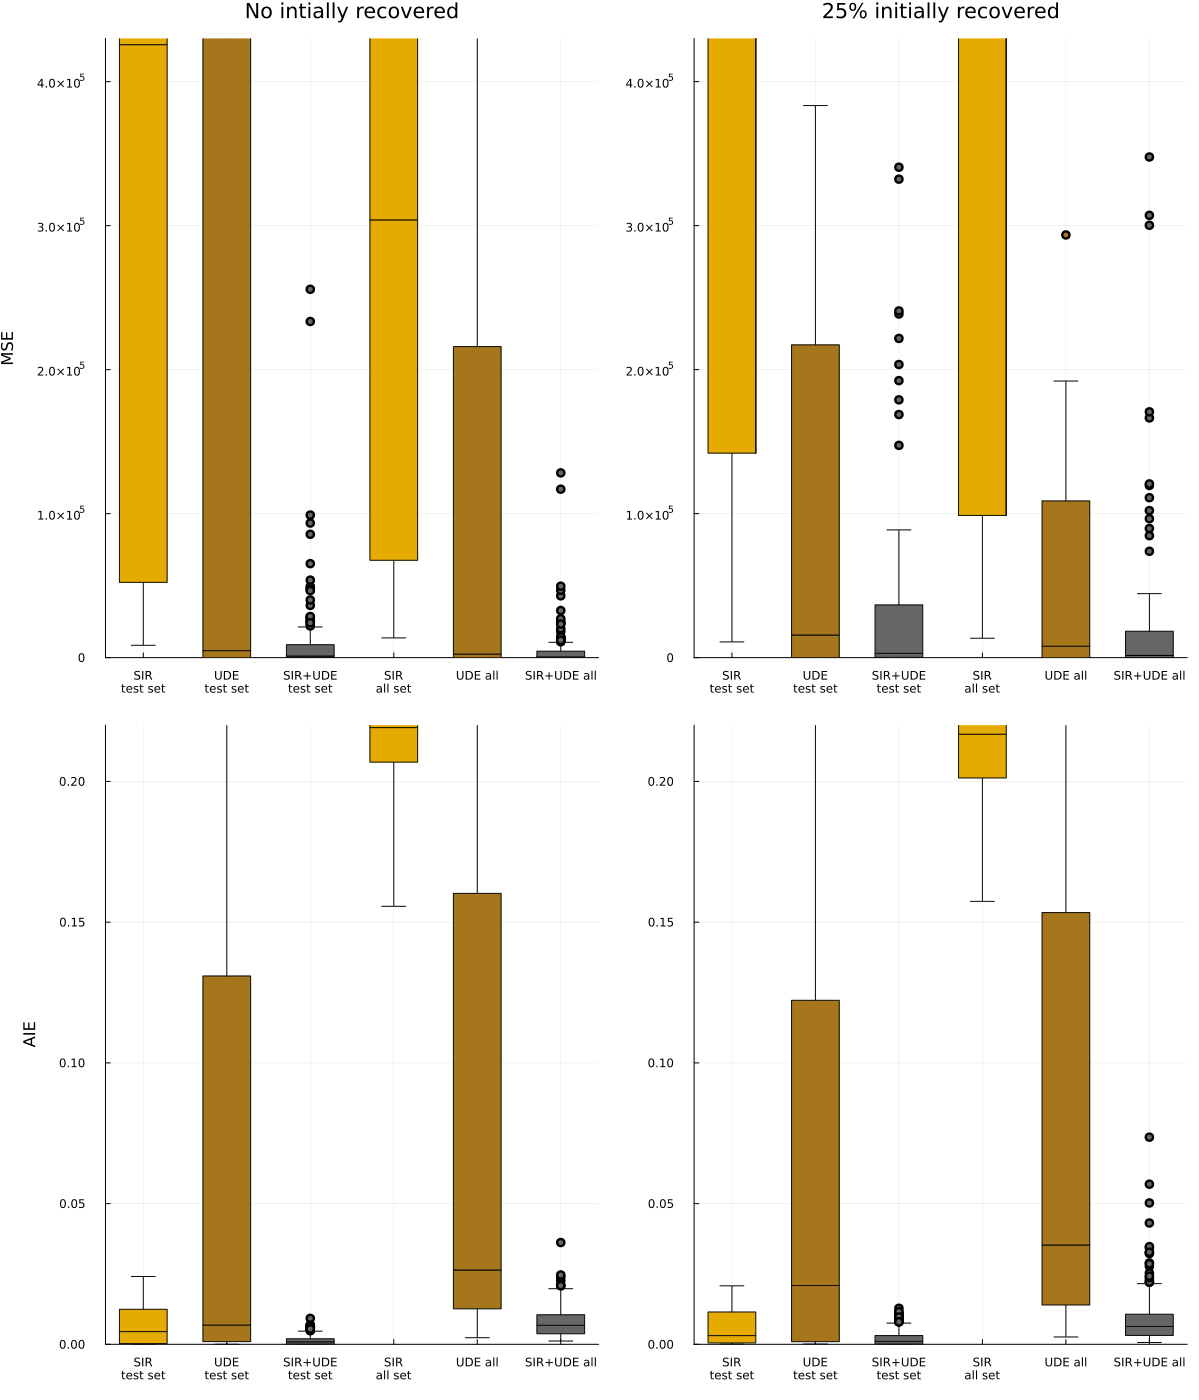

"/Users/adrocampos/covid19/model_comparison.pdf"

In [30]:
labe = ["SIR\ntest set" "UDE\ntest set" "SIR+UDE\ntest set" "SIR\nall set" "UDE all" "SIR+UDE all"]
mse_lims = (0,430_000)
ind_lims = (0,.22)

boxplot_mse_no_init = boxplot(labe, hcat(no_init_results_ode_mse_test, no_init_results_ann_mse_test, no_init_results_uode_mse_test, no_init_results_ode_mse_all, no_init_results_ann_mse_all, no_init_results_uode_mse_all), legend=false, ylim=mse_lims, palette=palette_models, yguide="MSE")
boxplot_mse_quarter = boxplot(labe, hcat(quarter_results_ode_mse_test, quarter_results_ann_mse_test, quarter_results_uode_mse_test, quarter_results_ode_mse_all, quarter_results_ann_mse_all, quarter_results_uode_mse_all), legend=false, ylim=mse_lims, palette=palette_models)

boxplot_rel_no_init = boxplot(labe, hcat(no_init_results_ode_rel_test, no_init_results_ann_rel_test, no_init_results_uode_rel_test, no_init_results_ode_rel_all, no_init_results_ann_rel_all, no_init_results_uode_rel_all), legend=false, palette=palette_models, ylim=ind_lims, ylabel="AIE")
boxplot_rel_quarter = boxplot(labe, hcat(quarter_results_ode_rel_test, quarter_results_ann_rel_test, quarter_results_uode_rel_test, quarter_results_ode_rel_all, quarter_results_ann_rel_all, quarter_results_uode_rel_all), legend=false, palette=palette_models, ylim=ind_lims)

boxplots = plot(boxplot_mse_no_init, boxplot_mse_quarter, boxplot_rel_no_init,boxplot_rel_quarter, layout=(2,2), size=(1200,1400), title=["No intially recovered" "25% initially recovered" "" ""], left_margin=5mm)
display(boxplots)
savefig(boxplots, "model_comparison.pdf")

### Cummulative predictions

In [31]:
all_plots = []

Any[]

In [33]:
tspan_test  = (1,501)
tspan_train = (1,251)
mobility = ["border", "inv_dist", "neighbor"][2]

all_obs_S = []
all_obs_I = []
all_obs_R = []
all_ode_S = []
all_ode_I = []
all_ode_R = []
all_ann_S = []
all_ann_I = []
all_ann_R = []
all_uode_S = []
all_uode_I = []
all_uode_R = []


### Run twice before plotting, once for each intialization
# for init in collect(1:20)
for init in collect(51:70)
    
    init_obs  = Any[]
    init_ode  = Any[]
    init_ann  = Any[]
    init_uode = Any[]
    
        for target_region in collect(1:10)
     
            ## Loading training and testing data
            data_dir = "/Users/adrocampos/covid19/synth_data/"
            file_name = "SIR_" * string(10) * "_regions_" * mobility * "_" * string(init) * ".csv"
            # println("Input file = ", data_dir * file_name)
            
            csv_reader = CSV.File(data_dir * file_name, types=Float64) 
            df = DataFrame(csv_reader)
            X = Matrix(df)[:,2:end] ## Filtering out t
            mask = (1:10:5001) ## Defines resolution of input data
            X = X[mask, :]'
            
            universe = range(1, size(X)[1], step=1)
            index_target = (target_region - 1) * 3 + 1
            targets = [index_target, index_target+1, index_target+2]
            adjacents = setdiff(universe , targets)
            
            x_target = X[targets,:]
            x_adjacent = X[adjacents,:]
            x_test = x_target[:,1:tspan_test[2]]
            
            ## Loading preedictions
            folder_name = "SIR_discovery/SIR_" * string(10) * "_regions_" * mobility * "_" * string(tspan_train[2]) *  "/"
            save_dir = "/Users/adrocampos/covid19/" * folder_name * "init_" * lpad(init,2,"0")  * "/region_" * lpad(target_region,2,"0") * "/"
            ode_pred  = load(save_dir * "1_ODE_pred.jld", "ODE_pred")
            ann_pred  = load(save_dir * "2_ANN_pred.jld", "ANN_pred")
            uode_pred = load(save_dir * "3_UODE_pred.jld", "UODE_pred")
            
            push!(init_obs, x_test)
            push!(init_ode, ode_pred)
            push!(init_ann, ann_pred)
            push!(init_uode, uode_pred)
            
        end

    init_obs = reduce(vcat, init_obs)
    init_ode = reduce(vcat, init_ode)
    init_ann = reduce(vcat, init_ann)
    init_uode = reduce(vcat, init_uode)

    init_obs_S = sum(init_obs[1:3:30,:], dims=1)
    init_obs_I = sum(init_obs[2:3:30,:], dims=1)
    init_obs_R = sum(init_obs[3:3:30,:], dims=1)
    push!(all_obs_S, init_obs_S)
    push!(all_obs_I, init_obs_I)
    push!(all_obs_R, init_obs_R)

    init_ode_S = sum(init_ode[1:3:30,:], dims=1)
    init_ode_I = sum(init_ode[2:3:30,:], dims=1)
    init_ode_R = sum(init_ode[3:3:30,:], dims=1)
    push!(all_ode_S, init_ode_S)
    push!(all_ode_I, init_ode_I)
    push!(all_ode_R, init_ode_R)

    init_ann_S = sum(init_ann[1:3:30,:], dims=1)
    init_ann_I = sum(init_ann[2:3:30,:], dims=1)
    init_ann_R = sum(init_ann[3:3:30,:], dims=1)
    push!(all_ann_S, init_ann_S)
    push!(all_ann_I, init_ann_I)
    push!(all_ann_R, init_ann_R)

    init_uode_S = sum(init_uode[1:3:30,:], dims=1)
    init_uode_I = sum(init_uode[2:3:30,:], dims=1)
    init_uode_R = sum(init_uode[3:3:30,:], dims=1)
    push!(all_uode_S, init_uode_S)
    push!(all_uode_I, init_uode_I)
    push!(all_uode_R, init_uode_R)
        
end

all_obs_S = reduce(vcat, all_obs_S)
all_obs_I = reduce(vcat, all_obs_I)
all_obs_R = reduce(vcat, all_obs_R)
all_ode_S = reduce(vcat, all_ode_S)
all_ode_I = reduce(vcat, all_ode_I)
all_ode_R = reduce(vcat, all_ode_R)
all_ann_S = reduce(vcat, all_ann_S)
all_ann_I = reduce(vcat, all_ann_I)
all_ann_R = reduce(vcat, all_ann_R)
all_uode_S = reduce(vcat, all_uode_S)
all_uode_I = reduce(vcat, all_uode_I)
all_uode_R = reduce(vcat, all_uode_R)

line_Ss = errorline(all_obs_S',   errorstyle=:ribbon, label="S Observed" ,secondarycolor=:matched, palette=[c_S], legend=:topright, left_margin=0mm, bottom_margin=1mm, ylims=(-1e4, 3.5e4), ylabel="S Susceptible", lw=2)
line_Ss = errorline!(all_ode_S',  errorstyle=:ribbon, label="S SIR"      ,secondarycolor=:matched, palette=[c_ode])
line_Ss = errorline!(all_ann_S',  errorstyle=:ribbon, label="S UDE"      ,secondarycolor=:matched, palette=[c_ann])
line_Ss = errorline!(all_uode_S', errorstyle=:ribbon, label="S UDE + SIR",secondarycolor=:matched, palette=[c_uode], margin=0Plots.mm)

line_Is = errorline(all_obs_I',   errorstyle=:ribbon, label="I Observed" ,secondarycolor=:matched, palette=[c_I], left_margin=1mm, bottom_margin=1mm, ylims=(-2000, 5000), ylabel="I Infected", lw=2)
line_Is = errorline!(all_ode_I',  errorstyle=:ribbon, label="I SIR"      ,secondarycolor=:matched, palette=[c_ode])
line_Is = errorline!(all_ann_I',  errorstyle=:ribbon, label="I UDE"      ,secondarycolor=:matched, palette=[c_ann])
line_Is = errorline!(all_uode_I', errorstyle=:ribbon, label="I UDE + SIR",secondarycolor=:matched, palette=[c_uode])

line_Rs = errorline(all_obs_R',   errorstyle=:ribbon, label="R Observed" ,secondarycolor=:matched, palette=[c_R], left_margin=1mm, bottom_margin=1mm,  xlabel="time in days",ylims=(0,5e4), ylabel="R Recovered", lw=2)
line_Rs = errorline!(all_ode_R',  errorstyle=:ribbon, label="R SIR"      ,secondarycolor=:matched, palette=[c_ode])
line_Rs = errorline!(all_ann_R',  errorstyle=:ribbon, label="R UDE"      ,secondarycolor=:matched, palette=[c_ann])
line_Rs = errorline!(all_uode_R', errorstyle=:ribbon, label="R UDE + SIR",secondarycolor=:matched, palette=[c_uode])

push!(all_plots, line_Ss)
push!(all_plots, line_Is)
push!(all_plots, line_Rs)

6-element Vector{Any}:
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}

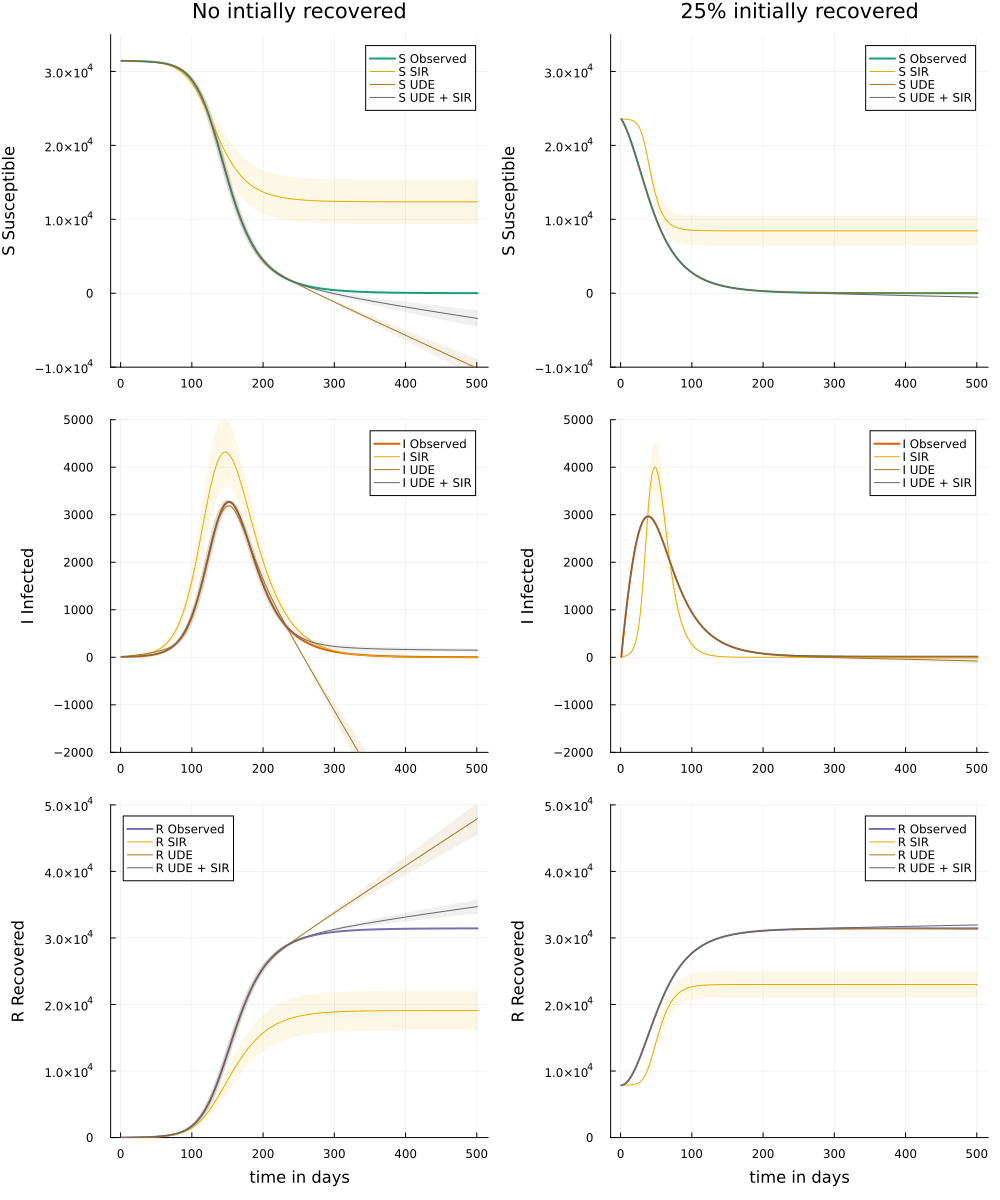

"/Users/adrocampos/covid19/cummulative_pred.pdf"

In [34]:
l = @layout [[a;b;c] [d;e;f]]
t=["No intially recovered" "" "" "25% initially recovered" "" ""]
p = plot(all_plots..., layout=l, size=(1000,1200), titles=t, left_margin=5mm)
display(p)
savefig(p, "cummulative_pred.pdf")

## Region specific plots

In [ ]:
tspan_test  = (1,501)
tspan_train = (1,251)
mobility = ["border", "inv_dist", "neighbor"][2]

all_plots = []

for target_region in 1:10
    
    obs_region = Any[]
    ode_preds  = Any[]
    ann_preds  = Any[]
    uode_preds = Any[]
    
        for init in inits ## Here we are doing all together
     
            ## Loading training and testing data
            data_dir = "/Users/adrocampos/covid19/synth_data/"
            file_name = "SIR_" * string(10) * "_regions_" * mobility * "_" * string(init) * ".csv"
            # println("Input file = ", data_dir * file_name)
            
            csv_reader = CSV.File(data_dir * file_name, types=Float64) 
            df = DataFrame(csv_reader)
            X = Matrix(df)[:,2:end] ## Filtering out t
            mask = (1:10:5001) ## Defines resolution of input data
            X = X[mask, :]'
            
            universe = range(1, size(X)[1], step=1)
            index_target = (target_region - 1) * 3 + 1
            targets = [index_target, index_target+1, index_target+2]
            adjacents = setdiff(universe , targets)
            
            x_target = X[targets,:]
            x_adjacent = X[adjacents,:]
            
            x_test = x_target[:,1:tspan_test[2]]
            
            ## Loading preedictions
            folder_name = "SIR_discovery/SIR_" * string(10) * "_regions_" * mobility * "_" * string(tspan_train[2]) *  "/"
            save_dir = "/Users/adrocampos/covid19/" * folder_name * "init_" * lpad(init,2,"0")  * "/region_" * lpad(target_region,2,"0") * "/"
            ode_pred  = load(save_dir  * "1_ODE_pred.jld", "ODE_pred")
            ann_pred  = load(save_dir  * "2_ANN_pred.jld", "ANN_pred")
            uode_pred = load(save_dir * "3_UODE_pred.jld", "UODE_pred")
            
            push!(obs_region, x_test)
            push!(ode_preds, ode_pred)
            push!(ann_preds, ann_pred)
            push!(uode_preds, uode_pred)
            
        end
    
        obs_region = reduce(vcat, obs_region)
        Ss_obs = obs_region[1:3:60,:] ## Here should not be 60 but 30
        Is_obs = obs_region[2:3:60,:]
        Rs_obs = obs_region[3:3:60,:]
        
        ode_preds = reduce(vcat, ode_preds)
        Ss_ode = ode_preds[1:3:60,:]
        Is_ode = ode_preds[2:3:60,:]
        Rs_ode = ode_preds[3:3:60,:]
        
        ann_preds = reduce(vcat, ann_preds)
        Ss_ann = ann_preds[1:3:60,:]
        Is_ann = ann_preds[2:3:60,:]
        Rs_ann = ann_preds[3:3:60,:]
        
        uode_preds = reduce(vcat, uode_preds)
        Ss_uode = uode_preds[1:3:60,:]
        Is_uode = uode_preds[2:3:60,:]
        Rs_uode = uode_preds[3:3:60,:]
    
        alphas_test = [fill(0.1, 251); ones(250)]
        alphas_train = [ones(251); fill(0.1, 250)]
        
        line_Ss = errorline(Ss_obs',   errorstyle=:ribbon, label="S Observed" ,secondarycolor=:matched, palette=c_S, legend=:bottomleft, left_margin=0mm, bottom_margin=1mm)
        line_Ss = errorline!(Ss_ode',  errorstyle=:ribbon, label="S SIR"      ,secondarycolor=:matched, palette=c_ode)
        line_Ss = errorline!(Ss_ann',  errorstyle=:ribbon, label="S UDE"      ,secondarycolor=:matched, palette=c_ann)
        line_Ss = errorline!(Ss_uode', errorstyle=:ribbon, label="S UDE + SIR",secondarycolor=:matched, palette=c_uode,margin=0Plots.mm)
        
        line_Is = errorline(Is_obs',   errorstyle=:ribbon, label="I Observed" ,secondarycolor=:matched, palette=c_I, left_margin=1mm, bottom_margin=1mm)
        line_Is = errorline!(Is_ode',  errorstyle=:ribbon, label="I SIR"      ,secondarycolor=:matched, palette=c_ode)
        line_Is = errorline!(Is_ann',  errorstyle=:ribbon, label="I UDE"      ,secondarycolor=:matched, palette=c_ann)
        line_Is = errorline!(Is_uode', errorstyle=:ribbon, label="I UDE + SIR",secondarycolor=:matched, palette=c_uode)
        
        line_Rs = errorline(Rs_obs',   errorstyle=:ribbon, label="R Observed" ,secondarycolor=:matched, palette=c_R, left_margin=1mm, bottom_margin=1mm)
        line_Rs = errorline!(Rs_ode',  errorstyle=:ribbon, label="R SIR"      ,secondarycolor=:matched, palette=c_ode)
        line_Rs = errorline!(Rs_ann',  errorstyle=:ribbon, label="R UDE"      ,secondarycolor=:matched, palette=c_ann)
        line_Rs = errorline!(Rs_uode', errorstyle=:ribbon, label="R UDE + SIR",secondarycolor=:matched, palette=c_uode)

        push!(all_plots, line_Ss)
        push!(all_plots, line_Is)
        push!(all_plots, line_Rs)
        
end


p = plot(all_plots..., layout=(10,3), size=(1200, 3000), left_margin=3mm)
display(p)
savefig(p, "pred_.pdf")

## Best init for Sindy

In [36]:
results_inits = Float64[]

tspan_test  = 1:501
tspan_train = 1:251
mobility = ["border", "inv_dist", "neighbor"][2]

for init in 1:20

    results_region = Float64[]

    for target_region in 1:10

        ## Loading training and testing data
        data_dir = "/Users/adrocampos/covid19/synth_data/"
        file_name = "SIR_" * string(10) * "_regions_" * mobility * "_" * string(init) * ".csv"

        csv_reader = CSV.File(data_dir * file_name, types=Float64) 
        df = DataFrame(csv_reader)
        X = Matrix(df)[:,2:end] ## Filtering out t
        mask = (1:10:5001) ## Defines resolution of input data
        X = X[mask, :]'
        
        universe = range(1, size(X)[1], step=1)
        index_target = (target_region - 1) * 3 + 1
        targets = [index_target, index_target+1, index_target+2]
        adjacents = setdiff(universe , targets)
    
        x_target = X[targets,:]
        x_adjacent = X[adjacents,:]
        x_test = x_target[:,tspan_test]

        ## Loading preedictions
        folder_name = "SIR_discovery/SIR_" * string(10) * "_regions_" * mobility * "_" * string(tspan_train[end]) *  "/"
        save_dir = "/Users/adrocampos/covid19/" * folder_name * "init_" * lpad(init,2,"0")  * "/region_" * lpad(target_region,2,"0") * "/"
        uode_pred = load(save_dir * "3_UODE_pred.jld", "UODE_pred")

        push!(results_region, mse(uode_pred[:,tspan_test], x_test))
        
    end

    push!(results_inits, sum(results_region))
         
end

println("Best = ", findmin(results_inits))

Best = (146111.40439360516, 16)


In [37]:
results_inits = Float64[]

tspan_test  = 1:501
tspan_train = 1:251
mobility = ["border", "inv_dist", "neighbor"][2]

for init in 51:70

    results_region = Float64[]

    for target_region in 1:10

        ## Loading training and testing data
        data_dir = "/Users/adrocampos/covid19/synth_data/"
        file_name = "SIR_" * string(10) * "_regions_" * mobility * "_" * string(init) * ".csv"

        csv_reader = CSV.File(data_dir * file_name, types=Float64) 
        df = DataFrame(csv_reader)
        X = Matrix(df)[:,2:end] ## Filtering out t
        mask = (1:10:5001) ## Defines resolution of input data
        X = X[mask, :]'
        
        universe = range(1, size(X)[1], step=1)
        index_target = (target_region - 1) * 3 + 1
        targets = [index_target, index_target+1, index_target+2]
        adjacents = setdiff(universe , targets)
    
        x_target = X[targets,:]
        x_adjacent = X[adjacents,:]
        x_test = x_target[:,tspan_test]

        ## Loading predictions
        folder_name = "SIR_discovery/SIR_" * string(10) * "_regions_" * mobility * "_" * string(tspan_train[end]) *  "/"
        save_dir = "/Users/adrocampos/covid19/" * folder_name * "init_" * lpad(init,2,"0")  * "/region_" * lpad(target_region,2,"0") * "/"
        uode_pred = load(save_dir * "3_UODE_pred.jld", "UODE_pred")

        push!(results_region, mse(uode_pred[:,tspan_test], x_test))
        
    end

    push!(results_inits, sum(results_region))
         
end

println("Best = ", findmin(results_inits))

Best = (17968.291603884558, 1)


### Results SInDy

In [38]:
init = 51
tspan_test = 1:501
save_dir_sindy = "/Users/adrocampos/covid19/sindy/init_" * lpad(init,2,"0") * "/"

mse_uode = Float64[]
aie_uode = Float64[]

mse_sindy = Float64[]
aie_sindy = Float64[]


for target_region in 1:10

    ## Loading training and testing data
    data_dir = "/Users/adrocampos/covid19/synth_data/"
    file_name = "SIR_" * string(10) * "_regions_" * mobility * "_" * string(init) * ".csv"

    csv_reader = CSV.File(data_dir * file_name, types=Float64) 
    df = DataFrame(csv_reader)
    X = Matrix(df)[:,2:end] ## Filtering out t
    mask = (1:10:5001) ## Defines resolution of input data
    X = X[mask, :]'
    
    universe = range(1, size(X)[1], step=1)
    index_target = (target_region - 1) * 3 + 1
    targets = [index_target, index_target+1, index_target+2]
    adjacents = setdiff(universe , targets)

    x_target = X[targets,:]
    x_adjacent = X[adjacents,:]
    x_test = x_target[:,tspan_test]

    ## Loading SIR+UDE predictions
    folder_name = "SIR_discovery/SIR_" * string(10) * "_regions_" * mobility * "_" * string(tspan_train[end]) *  "/"
    save_dir = "/Users/adrocampos/covid19/" * folder_name * "init_" * lpad(init,2,"0")  * "/region_" * lpad(target_region,2,"0") * "/"
    pred_uode = load(save_dir * "3_UODE_pred.jld", "UODE_pred")
    pred_uode = pred_uode[:,tspan_test]

    push!(mse_uode, mse(pred_uode, x_test))
    push!(aie_uode, error_incidence(pred_uode, x_test))

    ## Loading SINDY predictions
    pred_sindy = load(save_dir_sindy * "4_SINDY_pred_region_" * lpad(target_region, 2,"0") * ".jld", "SINDY_pred")
    pred_sindy = pred_sindy[:, tspan_test]
    println(size(pred_sindy))

    push!(mse_sindy, mse(pred_sindy, x_test))
    push!(aie_sindy, error_incidence(pred_sindy, x_test))


    
end

println("sum(mse_uode) = ",sum(mse_uode))
println("sum(mse_sindy) = ",sum(mse_sindy))

println("sum(aie_uode) = ",sum(aie_uode))
println("sum(aie_sindy) = ",sum(aie_sindy))

(3, 501)
(3, 501)
(3, 501)
(3, 501)
(3, 501)
(3, 501)
(3, 501)
(3, 501)
(3, 501)
(3, 501)
sum(mse_uode) = 17968.291603884558
sum(mse_sindy) = 17974.815971360495
sum(aie_uode) = 0.029554362643523065
sum(aie_sindy) = 0.029420283281192956


### Plots SINDy

In [39]:
init = 16
tspan_test = 1:501
save_dir_sindy = "/Users/adrocampos/covid19/sindy/init_" * lpad(init,2,"0") * "/"

obs = Any[]
preds_uode  = Any[]
preds_sindy = Any[]


for target_region in 1:10

    ## Loading training and testing data
    data_dir = "/Users/adrocampos/covid19/synth_data/"
    file_name = "SIR_" * string(10) * "_regions_" * mobility * "_" * string(init) * ".csv"

    csv_reader = CSV.File(data_dir * file_name, types=Float64) 
    df = DataFrame(csv_reader)
    X = Matrix(df)[:,2:end] ## Filtering out t
    mask = (1:10:5001) ## Defines resolution of input data
    X = X[mask, :]'
    
    universe = range(1, size(X)[1], step=1)
    index_target = (target_region - 1) * 3 + 1
    targets = [index_target, index_target+1, index_target+2]
    adjacents = setdiff(universe , targets)

    x_target = X[targets,:]
    x_adjacent = X[adjacents,:]
    x_test = x_target[:,tspan_test]
    println(size(x_test))

    ## Loading SIR+UDE predictions
    folder_name = "SIR_discovery/SIR_" * string(10) * "_regions_" * mobility * "_" * string(tspan_train[end]) *  "/"
    save_dir = "/Users/adrocampos/covid19/" * folder_name * "init_" * lpad(init,2,"0")  * "/region_" * lpad(target_region,2,"0") * "/"
    pred_uode = load(save_dir * "3_UODE_pred.jld", "UODE_pred")
    pred_uode = pred_uode[:,tspan_test]

    ## Loading SINDY predictions
    pred_sindy = load(save_dir_sindy * "4_SINDY_pred_region_" * lpad(target_region, 2,"0") * ".jld", "SINDY_pred")
    pred_sindy = pred_sindy[:, tspan_test]

    push!(obs, x_test)
    push!(preds_uode, pred_uode)
    push!(preds_sindy, pred_sindy)
      
end

obs = reduce(vcat, obs)
preds_uode  = reduce(vcat, preds_uode)
preds_sindy = reduce(vcat, preds_sindy)

obs_no_init = reduce(vcat, [sum(obs[1:3:30,:], dims=1), sum(obs[2:3:30,:], dims=1), sum(obs[3:3:30,:], dims=1)])
preds_uode_no_init = reduce(vcat, [sum(preds_uode[1:3:30,:], dims=1), sum(preds_uode[2:3:30,:], dims=1), sum(preds_uode[3:3:30,:], dims=1)])
preds_sindy_no_init = reduce(vcat, [sum(preds_sindy[1:3:30,:], dims=1), sum(preds_sindy[2:3:30,:], dims=1), sum(preds_sindy[3:3:30,:], dims=1)])

init = 51
tspan_test = 1:501
save_dir_sindy = "/Users/adrocampos/covid19/sindy/init_" * lpad(init,2,"0") * "/"

obs = Any[]
preds_uode  = Any[]
preds_sindy = Any[]


for target_region in 1:10

    ## Loading training and testing data
    data_dir = "/Users/adrocampos/covid19/synth_data/"
    file_name = "SIR_" * string(10) * "_regions_" * mobility * "_" * string(init) * ".csv"

    csv_reader = CSV.File(data_dir * file_name, types=Float64) 
    df = DataFrame(csv_reader)
    X = Matrix(df)[:,2:end] ## Filtering out t
    mask = (1:10:5001) ## Defines resolution of input data
    X = X[mask, :]'
    
    universe = range(1, size(X)[1], step=1)
    index_target = (target_region - 1) * 3 + 1
    targets = [index_target, index_target+1, index_target+2]
    adjacents = setdiff(universe , targets)

    x_target = X[targets,:]
    x_adjacent = X[adjacents,:]
    x_test = x_target[:,tspan_test]
    println(size(x_test))

    ## Loading SIR+UDE predictions
    folder_name = "SIR_discovery/SIR_" * string(10) * "_regions_" * mobility * "_" * string(tspan_train[end]) *  "/"
    save_dir = "/Users/adrocampos/covid19/" * folder_name * "init_" * lpad(init,2,"0")  * "/region_" * lpad(target_region,2,"0") * "/"
    pred_uode = load(save_dir * "3_UODE_pred.jld", "UODE_pred")
    pred_uode = pred_uode[:,tspan_test]

    ## Loading SINDY predictions
    pred_sindy = load(save_dir_sindy * "4_SINDY_pred_region_" * lpad(target_region, 2,"0") * ".jld", "SINDY_pred")
    pred_sindy = pred_sindy[:, tspan_test]

    push!(obs, x_test)
    push!(preds_uode, pred_uode)
    push!(preds_sindy, pred_sindy)
      
end

obs = reduce(vcat, obs)
preds_uode  = reduce(vcat, preds_uode)
preds_sindy = reduce(vcat, preds_sindy)

obs_quart = reduce(vcat, [sum(obs[1:3:30,:], dims=1), sum(obs[2:3:30,:], dims=1), sum(obs[3:3:30,:], dims=1)])
preds_uode_quart = reduce(vcat, [sum(preds_uode[1:3:30,:], dims=1), sum(preds_uode[2:3:30,:], dims=1), sum(preds_uode[3:3:30,:], dims=1)])
preds_sindy_quart = reduce(vcat, [sum(preds_sindy[1:3:30,:], dims=1), sum(preds_sindy[2:3:30,:], dims=1), sum(preds_sindy[3:3:30,:], dims=1)])

(3, 501)
(3, 501)
(3, 501)
(3, 501)
(3, 501)
(3, 501)
(3, 501)
(3, 501)
(3, 501)
(3, 501)
(3, 501)
(3, 501)
(3, 501)
(3, 501)
(3, 501)
(3, 501)
(3, 501)
(3, 501)
(3, 501)
(3, 501)


3×501 Matrix{Float64}:
 23576.0  23413.9    23240.3   …   -412.762    -414.525    -416.287
    10.0    163.361    313.13        17.6926     17.6864     17.6801
  7861.0   7869.7     7893.55     31842.1     31843.8     31845.6

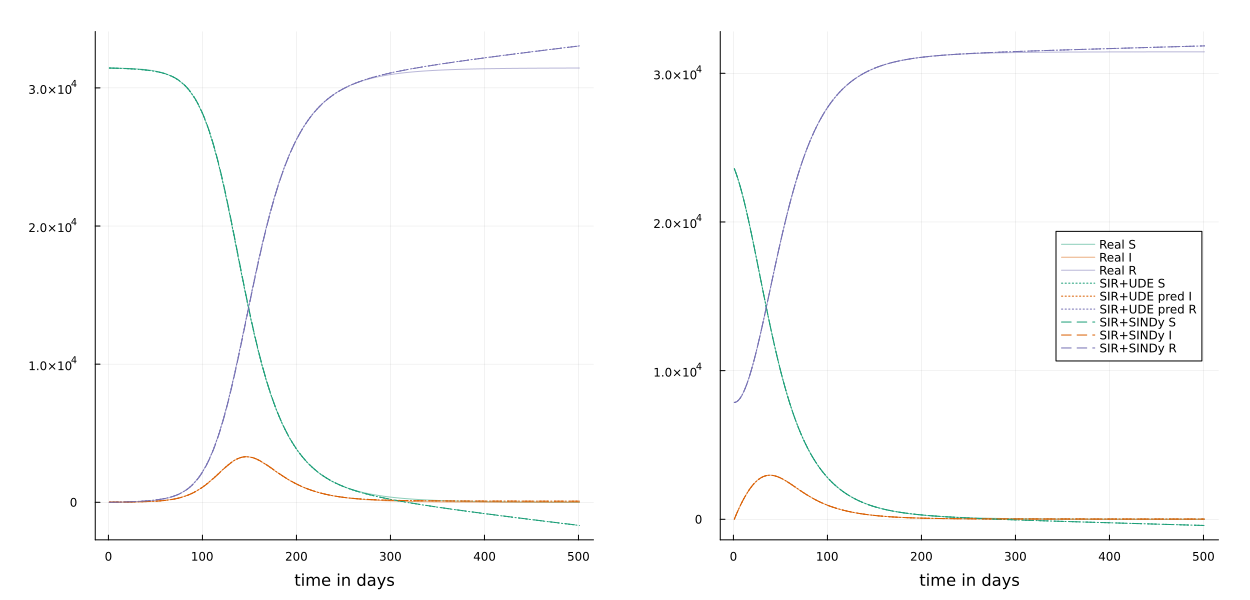

"/Users/adrocampos/covid19/sindy_preds.pdf"

In [40]:
plt_1 = plot(obs_no_init', labels=nothing, lw=1, palette=palette_SIR, lalpha=.5, xlabel="time in days",)
plt_1 = plot!(preds_uode_no_init', labels=nothing, ls=:dot, palette=palette_SIR)
plt_1 = plot!(preds_sindy_no_init', labels=nothing, ls=:dash, lw=1, palette=palette_SIR)
plt_1 = plot!(legend=:right)

plt_2 = plot(obs_quart', labels=["Real S" "Real I" "Real R"], lw=1, palette=palette_SIR, lalpha=.5)
plt_2 = plot!(preds_uode_quart', labels=["SIR+UDE S" "SIR+UDE pred I" "SIR+UDE pred R"], ls=:dot, palette=palette_SIR)
plt_2 = plot!(preds_sindy_quart', labels=["SIR+SINDy S" "SIR+SINDy I" "SIR+SINDy R"], ls=:dash, lw=1, palette=palette_SIR, xlabel="time in days",)
plt_2 = plot!(legend=:right)

both = plot(plt_1, plt_2, legend=:right, size=(1250,600), margin=6mm)
display(both)
savefig(both, "sindy_preds.pdf")